## Main steps in training a Supervised Learning algorithm
- Selecting features and collecting labeled training examples
- Choosing a performance metric
- Choosing a classifier and optimization algorithm
- Evaluating the performance of a model
- Tuning the algorithm

### First steps with sklearn: Training a perceptron


In [1]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris.data[:,[2,3]]
y = iris.target
print("Class labels: ", np.unique(y))


Class labels:  [0 1 2]


- flower names are stored as integers
- integer labels are recommended to avoid technical glitches and improve computational performance due to small memory footprint

In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,
            test_size=0.3, random_state=1, stratify=y)

- train_test_split function already shuffles the training datasets internally before splitting; otherwise, all examples from class 0 and class 1 would have ended up in the training datasets, and the test dataset would consist of 45 examples from class 2. 
- random_state parameter provides a fixed random seed (random_state=1) for the internal pseudo-random number generator that is used for shuffling the datasets prior to splitting. 
- Using such a fixed random_state ensures that our results are reproducible
- stratification means that the train_test_split method returns training and test subsets that have the same proportions of class labels as the input dataset

In [3]:
print("Labels count in target: ", np.bincount(y))
print("Labels count in training set: ", np.bincount(y_train))
print("Labels count in test set: ", np.bincount(y_test))

Labels count in target:  [50 50 50]
Labels count in training set:  [35 35 35]
Labels count in test set:  [15 15 15]


In [4]:
# Feature Scaling
# from sklearn.preprocessing import StandardSacler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

sc.fit(X_train) #finds the parmeter mu and sigma

X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [5]:
from sklearn.linear_model import Perceptron
# from sklearn.linear_model
ppn = Perceptron(eta0=0.1, random_state=1)
ppn.fit(X_train_std, y_train)

Perceptron(eta0=0.1, random_state=1)

In [6]:
y_pred = ppn.predict(X_test_std)
print("Misclassified examples: %d " %(y_test != y_pred).sum())

Misclassified examples: 1 


In [7]:
from sklearn.metrics import accuracy_score
print("Accuracy: %3f" %(accuracy_score(y_test,y_pred)))

Accuracy: 0.977778


In [8]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, test_idx = None, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max = X[:,0].min() - 1, X[:,0].max() + 1
    x2_min, x2_max = X[:,1].min() - 1, X[:,1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                          np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1,xx2, Z, alpha=0.3, cmap = cmap)
    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())
    
    # plot class examples
    for idx, c1 in enumerate(np.unique(y)):
        plt.scatter(x=X[y==c1,0], y = X[y==c1, 1], alpha=0.8,
                   c=colors[idx], marker= markers[idx],
                   label=c1,edgecolor='black')
        
    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1],
                     edgecolor='black', alpha=1.0,
                    linewidth=1, marker='o',
                    s=100, label='test set')

/tmp/ipykernel_852782/960867985.py:22: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y==c1,0], y = X[y==c1, 1], alpha=0.8,


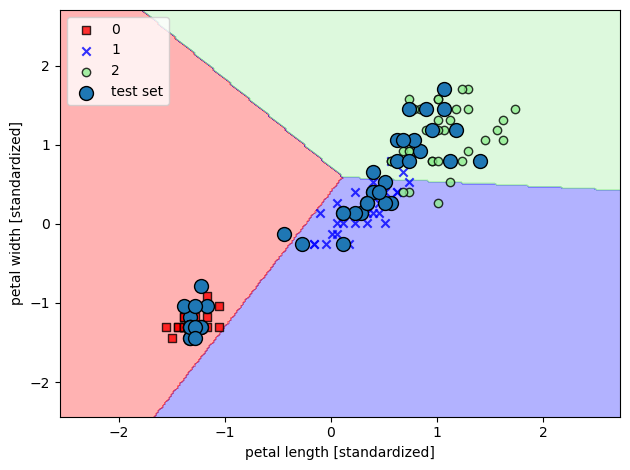

In [9]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X=X_combined_std,y=y_combined,
                      classifier=ppn,test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

- three flower classes cannot be perfectly separated by a linear decision boundary
- perceptron algorithm never converges on datasets that aren't perfectly linearly separable, which is why the use of the perceptron algorithm is typically not recommended in practice.

### Modeling class probabilities via logisitic regression

#### Logistic regression and conditional probabilities

- __odds__: $\frac{p}{1-p}$
- p = probability of an event we want to predict. Think of a positivie event as class label y=1
- __logit fn__: $logit(p) =log \frac{p}{1-p}$
- __logit(p(y=1|x))__ = $\sum^m_{i=0} w_ix_i$ = __$w^Tx$__
    - p(y=1|x) is the conditional probability that an example belongs to class 1 given the features __x__
- __logistic sigmoid function/ sigmoid function__
    - $\phi(z) = \frac{1}{1+e^{-z}}$
    - z = $w^Tx$ is the net input (linar combn of wts and inputs)

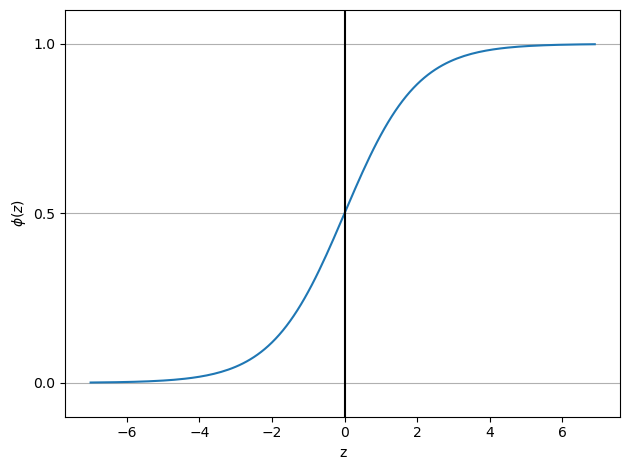

In [10]:
import matplotlib.pyplot as plt
import numpy as np
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))
z = np.arange(-7, 7, 0.1)
phi_z = sigmoid(z)
plt.plot(z, phi_z)
plt.axvline(0.0, color='k')
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\phi (z)$')
# y axis ticks and gridline
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)
plt.tight_layout()
plt.show()

# from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=100.0, random_state=1,
                       solver='lbfgs', multi_class='ovr')
lr.fit(X_train_std, y_train)

plot_decision_regions(X=X_combined_std,y=y_combined,
                      classifier=lr,test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [11]:
# Probability that training examples belong to a certain class 
# can be computed with predict_proba

lr.predict_proba(X_test_std[:3,:])

NameError: name 'lr' is not defined

In [ ]:
lr.predict_proba(X_test_std[:3,:]).sum(axis=1)

- first flower tested belongs to class 3 (Iris-virginica) with 85% probability
- second flower tested belongs to class 1 (Iris-setosa) with 83% probability. similarly for third
- we can get this with the argmax function

In [ ]:
lr.predict_proba(X_test_std[:3,:]).argmax(axis=1)

- Computed conditional probabilities and coverted them into class labels manually using Numpy's argmax function
- more conveniently done with sklearn predict method


In [ ]:
lr.predict(X_test_std[:3,:])

__Caution__
- If we want to predict the class label of a single flower, sklearn expects 2D array as input. 
- We have to convert single row slice into such a format first


In [ ]:
lr.predict(X_test_std[0,:].reshape(1,-1))

## Tackling overfitting with regularization
- __Overfitting__: 
    - model perform very well on training data
    - does not generalize well to unseen/test data
    - overfitted model has high variance ( too many parameters)
    - too complex model
- __Underfitting__:
    - high bias 
    - model not complex enough to capture pattern in the training data
    - also performs low on unseen/test data
    
- __Variance__: consistency of the model prediction for a particular example if we retrain the model multiple times, for e.g., on different subsets of the training dataset
- __Bias__: measures how far off the predictions are from the correct values in general if we rebuild the models multiple time on different training datasets
- Finding good bias-variance tradeoff by tuning the complexity of the model via __regularization__
- introduce additional info (bias) to penalize extreme parameters (weight) values. 
- most common form: L2 regularization written as 

$\frac{\lambda}{2} ||w||^2 = \frac{\lambda}{2}\sum^m_{j=1}w^2_j$

- where $\lambda$ is the regularization parameter

- parameter, c, in LogisticRegression is the inverse of $\lambda$

In [ ]:
weights, params = [], []
for c in np.arange(-5, 5):
    lr = LogisticRegression(C=10.**c, random_state=1,
    solver='lbfgs', multi_class='ovr')
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10.**c)
weights = np.array(weights)
plt.plot(params, weights[:, 0],label='petal length')
plt.plot(params, weights[:, 1], linestyle='--',label='petal width')
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.legend(loc='upper left')
plt.xscale('log')
plt.show()

## Maximum margin classification with SVM
- extension of perceptron
- perceptron minimized misclassification errors; SVM maximize the margin
- margin: distance between separating hyperplane (decision boundary) and the training examples that are closest to this hyperplane (also called support vectors)

### Maximum margin intuition
- larger margin DB have lower generalization error
- smaller margin DB are prone to overfitting


In [ ]:
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(X_train_std, y_train)
plot_decision_regions(X=X_combined_std,y=y_combined,
                      classifier=svm,test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(1)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0,X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)
plt.scatter(X_xor[y_xor == 1, 0],
                X_xor[y_xor == 1, 1],c='b', marker='x',label='1')
plt.scatter(X_xor[y_xor == -1, 0],X_xor[y_xor == -1, 1],c='r',
marker='s',label='-1')
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend(loc='best')
plt.tight_layout()
plt.show()

- cannot separate +ve and -ve class well using linear hyperplane as a decision boundary via linear LogisticRegression or linear SVM
- __kernel methods__ deal with such linearly inseparable data by creating non-linear combinations of the original features to project them onto a higher-dimensional space via a mapping function, $\phi$, where the data becomes linearly separable

## Using kernel trick to find separating hyperplanes in a high-dimensional space

- kernel function:
    $\kappa(x^{(i)},x^{(j)})$ = $\phi(x^{(i)})^T\phi(x^{(j)})$
- commonly used kernel: __radial basis function (RBF)__, can simply be __Gaussian kernel__

$\kappa(x^{(i)},x^{(j)})$ = exp$(-\frac{||x^{(i)}-x^{(j)}||^2}{2\sigma^2})$

- oftern simplified as 
$\kappa(x^{(i)},x^{(j)})$ = exp$(-\gamma||x^{(i)}-x^{(j)}||^2)$

- with $\gamma = \frac{1}{2\sigma^2}$
- the term kernel can be interpreted as a similarity function between a pair of examples/instances

In [ ]:
svm = SVC(kernel='rbf', random_state=1, gamma=0.10, C=10.0)
svm.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

- $\gamma$: take it as a cut-off parameter for the Gaussian sphere
- increasing $\gamma$: increases influence of training examples: tighter and bumpier decision boundary

In [ ]:
# Observe the effect of $\gamma$ on the decision boundary

svm = SVC(kernel='rbf', random_state=1, gamma=10.0, C=10.0)
svm.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

### Applying RBF kernel SVM to Iris flower dataset

In [ ]:
svm = SVC(kernel='rbf', random_state=1, gamma=0.2, C=1.0)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=svm,
                     test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
# let us try a higher value of gamma parameter
svm = SVC(kernel='rbf', random_state=1, gamma=100.0, C=1.0)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=svm,
                     test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

- higher $\gamma$ implies overfitting: fits training data very well but have a very high generalization on unseen data


## Decision Tree Learning
- breaking down dta by making decision based on asking a series of questions
- start at _tree root_ and split data on the feature that results in the largest __information gain (IG)__
- iteratively split at each child node until the leaves are pure
- can result in a very deep tree with many nodes leading to overfitting
- _prune_ the tree by setting a limit for the maximal depth of the tree

### Maximinizing IG
- to split nodes on the most informative features
    - define an objective fn that we want to optimize
- maximize IG at each split defined as follows

$IG(D_p,f) = I(D_p) - \sum^m_{j=1}\frac{N_j}{N_p}I(D_j)$

- _f_ = feature to perform the split
- $D_p$ and $D_j$: dataset of parent and $j^{th}$ child node
- _I_: impurity measure
- $N_p$: total no. of training examples in parent node
- $N_j$: no. of examples in $j^{th}$ child node

- _IG_ = difference of impurity of the parent node and the sum of child node impurities
- For simplicity, binary decision trees are implemented: each parent node is split into two child nodes, $D_{left}$ and $D_{right}$

$IG(D_p,f)$ = $I(D_p)$ - $\frac{N_{left}}{N_p}I(D_{left})$ - $\frac{N_{right}}{N_p}I(D_{right})$

- three impurity measures are commonly used: 
    - Gini impurity ($I_G$)
    - entropy ($I_H$)
    - classification error ($I_E$)

__Entropy__

$I_H(t) =\sum^c_{i=1}p(i|t)log_2p(i|t)$
- _p(i|t)_: proprotion of examples that belong to the same _i_ for a particular node _t_
- Entropy = 0 if all examples at the node belong to the same class
    - the sum will reduce to a single term; and $log_2(1) = 0$
- Entropy = 1 if classes are uniformly distributed
    - _p(i=1|t) = 0.5_ and _p(i=0|t) = 0.5_
- Entropy attempts to maximize the mutual information in the tree

__Gini Impurity__ 

$I_G(t) = 1- \sum^c_{i=1}p(i|t)^2$

- Gini impurity is maximal if classes are perfectly mixed

__Classification error__

$I_E(t) = 1- max\{p(i|t)\}$


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
def gini(p):
    return (p)*(1 - (p)) + (1 - p)*(1 - (1-p))
def entropy(p):
    return - p*np.log2(p) - (1 - p)*np.log2((1 - p))
def error(p):
    return 1 - np.max([p, 1 - p])
x = np.arange(0.0, 1.0, 0.01)
ent = [entropy(p) if p != 0 else None for p in x]
sc_ent = [e*0.5 if e else None for e in ent]
err = [error(i) for i in x]
fig = plt.figure()
ax = plt.subplot(111)
for i, lab, ls, c, in zip([ent, sc_ent, gini(x), err],
                          ['Entropy', 'Entropy (scaled)',
                           'Gini impurity',
                           'Misclassification error'],
                          ['-', '-', '--', '-.'],
                          ['black', 'lightgray',
                           'red', 'green', 'cyan']):
    line = ax.plot(x, i, label=lab,
                   linestyle=ls, lw=2, color=c)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15),
          ncol=5, fancybox=True, shadow=False)
ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
ax.axhline(y=1.0, linewidth=1, color='k', linestyle='--')
plt.ylim([0, 1.1])
plt.xlabel('p(i=1)')
plt.ylabel('impurity index')

### Building a decision tree
- deeper decision tree = more complex decision boundary resulting in overfitting


/tmp/ipykernel_852782/960867985.py:22: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y==c1,0], y = X[y==c1, 1], alpha=0.8,


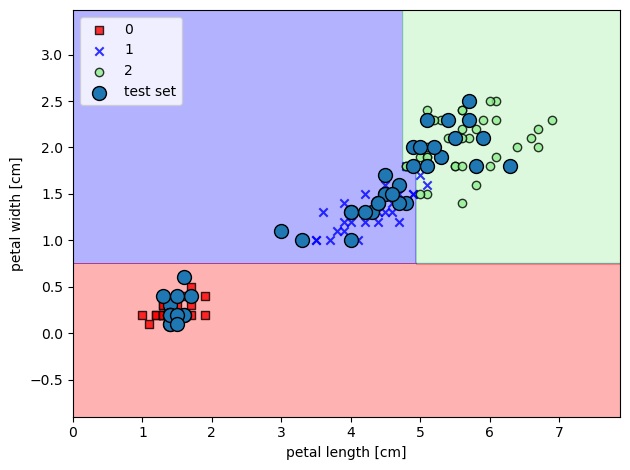

In [21]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(criterion='gini', max_depth=4,
                                   random_state=1)
tree_model.fit(X_train,y_train)
X_combined = np.vstack((X_train,X_test))
Y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X_combined, y_combined, classifier=tree_model,
                     test_idx=range(105,150))
plt.xlabel("petal length [cm]")
plt.ylabel("petal width [cm]")
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

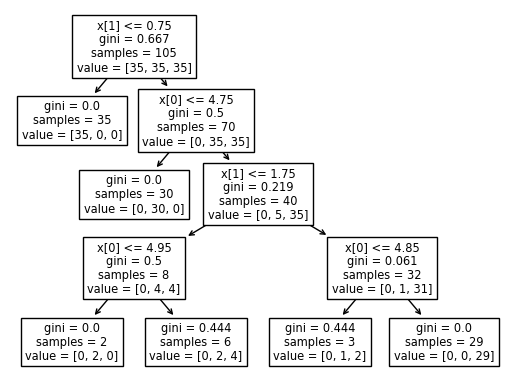

In [22]:
# Visualize the tree
from sklearn import tree
tree.plot_tree(tree_model)
plt.show()

/tmp/ipykernel_852782/960867985.py:22: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y==c1,0], y = X[y==c1, 1], alpha=0.8,


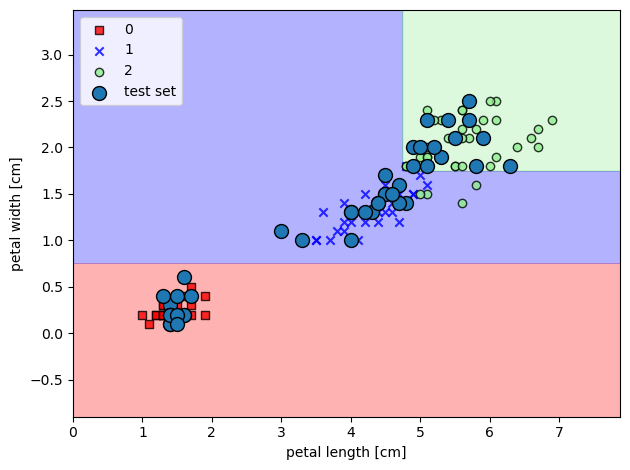

In [23]:
# What happens if a shallower tree (depth = 3) is chosen

from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(criterion='gini', max_depth=3,
                                   random_state=1)
tree_model.fit(X_train,y_train)
X_combined = np.vstack((X_train,X_test))
Y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X_combined, y_combined, classifier=tree_model,
                     test_idx=range(105,150))
plt.xlabel("petal length [cm]")
plt.ylabel("petal width [cm]")
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

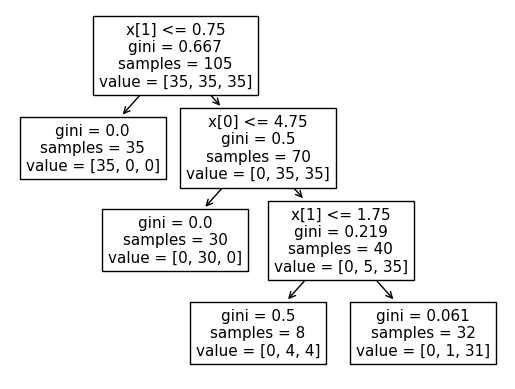

In [24]:
from sklearn import tree
tree.plot_tree(tree_model)
plt.show()

__Reducing the depth reduces the ability of the model to separate the flower classes__

### Combining multiple DT via random forest

- RF algorithm best known for its scalability and ease of use
- RF is an ensemble of decision trees
- RF averages multiple DT that individually suffer from high variance to build a more robust model that has a better generalization performance and can avoid overfitting
- Steps:
    - draw a random boostrap sample of size n (randomly choose n examples from training set with replacement)
    - grow a DT from the bootstrap sample. At each node:
        - randomly select _d_ features without replacement
        - split the node using the feature that provide the best split according to the objective function, for e.g. maximizing IG
    - repeat 1-2 _k_ times
    - aggregate the prediction by each tree to assign class label by __majority vote__
    
- Cons:
    - not as interpretable as DT
- Pros:
    - don't have to worry about choosing good hyperparameter value
    - don't need to prune RF since ensemble model is quite robust to noise from individual DT
    - only care about number of trees (_k_) for the random forest
        - larger the _k_, better the performance of the RF classifier but it comes with an increased compuatational cost
        
__How can we control the bias-variance tradeoff in RF?__
- via the sample size of the bootstrap sample, _n_
- decreasing _n_ increases diversity among the trees, since the probability of including a particular training example in the bootstrap sample is lower. 
- reducing _n_ may increase randomness of the RF and help reduce overfitting
- however, lower _n_ may result in lower performance of the RF

Time taken:  0.05714988708496094


/tmp/ipykernel_852782/960867985.py:22: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y==c1,0], y = X[y==c1, 1], alpha=0.8,


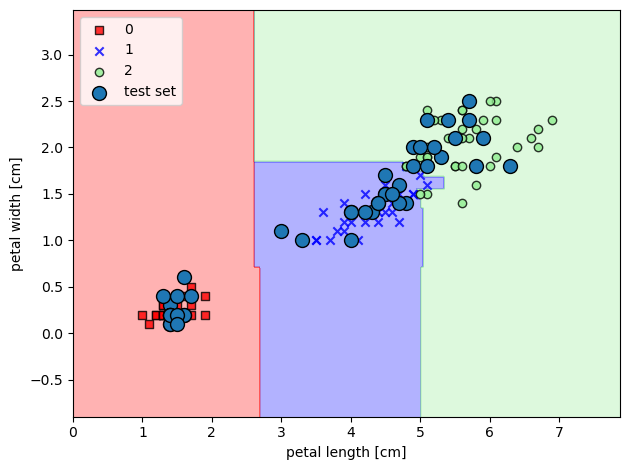

In [33]:
import time
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(criterion='gini', 
                                n_estimators = 25,random_state=1,
                                n_jobs = 4)
'''
n_jobs = no. of cores used for computation
n_estimators = no. of decision trees
Note: compuatational cost increases with increasing n_estimators
'''

start = time.time()
forest.fit(X_train,y_train)
end = time.time()

print("Time taken: ", end-start)
plot_decision_regions(X_combined, y_combined, classifier=forest,
                     test_idx=range(105,150))
plt.xlabel("petal length [cm]")
plt.ylabel("petal width [cm]")
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

Time taken:  0.0804135799407959


/tmp/ipykernel_852782/960867985.py:22: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y==c1,0], y = X[y==c1, 1], alpha=0.8,


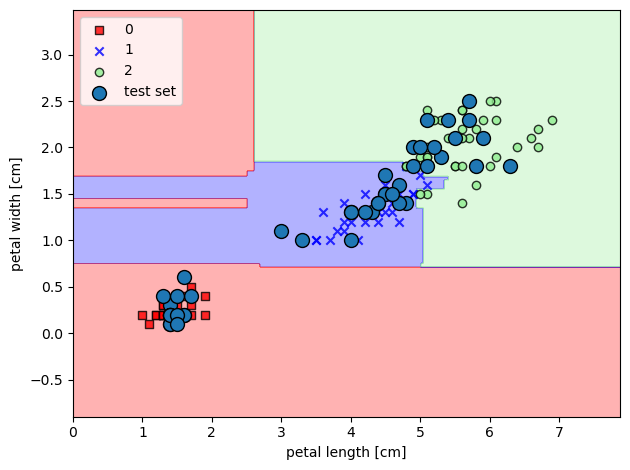

In [32]:
import time
from sklearn.ensemble import RandomForestClassifier
start = time.time()
forest = RandomForestClassifier(criterion='gini', n_estimators = 40,
                               random_state=1, n_jobs = 2)
forest.fit(X_train,y_train)
end = time.time()

print("Time taken: ", end-start)
plot_decision_regions(X_combined, y_combined, classifier=forest,
                     test_idx=range(105,150))
plt.xlabel("petal length [cm]")
plt.ylabel("petal width [cm]")
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

- RF models that are made with many trees also encode more complexity
- RF models that have many trees may overfit to the dataset they were trained on

## K-nearest neighbors
- supervised learning algorithm
- type of __lazy learner__
    - does not learn a discriminative fn from the training data but memorizes the dataset
    
- KNN is a non-parametric model (instance based learning)
- Steps:
    - choos the number of _k_ and a distance metric (e.g. Euclidean distance)
    - find _k_ nearest neighbors of the data record we want to classify
    - assign class label by majority vote

/tmp/ipykernel_852782/960867985.py:22: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y==c1,0], y = X[y==c1, 1], alpha=0.8,


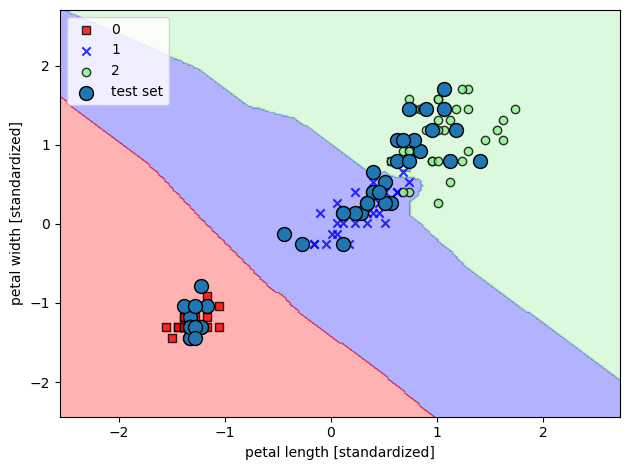

In [38]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
'''
metric='minkowski' chooses minkowski distance as the metric
    minkowski is a generalisation of the Euclidean where the
    1/2 in power is replaced by 1/p. So if p=2,
    minkowski = Euclidean
'''

knn.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined,
                      classifier=knn, test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

- _k_ determines over or underfitting
- If using Euclidean distance metric, the data has to be standardized in order for each feature to contribute equally to the distance

- KNN is very susceptible to overfitting
    - due to curse of dimensionality: feature space becomes increasingly sparse for an increasing number of dimensions of a fixed size training dataset
- Remedy    
    - regularization cannot be used in DT and KNN
    - can use feature selection and dimensionality reduction